In [29]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import spacy
nlp = spacy.load("en_core_web_sm")

import pandas as pd

from sem_covid.services.data_registry import Dataset
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.topic_visualizer import TopicInformation, \
    generate_wordcloud
from sem_covid.entrypoints.notebooks.topic_modeling.topic_modeling_wrangling.lda_modeling import WordsModeling

from sem_covid.services.sc_wrangling.data_cleaning import clean_remove_urls, clean_remove_numbers, clean_remove_emails


/home/daycu/work/Meaningfy/sem-covid/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Download dataset
#### Use base experiment function to concatenate and clean text data

In [2]:
pwdb = Dataset.PWDB.fetch()

/home/daycu/work/Meaningfy/sem-covid/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100% (1288 of 1288) |####################| Elapsed Time: 0:00:01 Time:  0:00:01


In [3]:
pwdb_descriptive_data = pwdb['title'].map(str) + ' ' + \
                        pwdb['background_info_description'].map(str) + ' ' + \
                        pwdb['content_of_measure_description'].map(str) + ' ' + \
                        pwdb['use_of_measure_description'] + ' ' + \
                        pwdb['involvement_of_social_partners_description']

/home/daycu/work/Meaningfy/sem-covid/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
def clean_text_from_specific_characters(document: pd.Series):

    unused_characters = ["\\r", ">", "\n", "\\", "<", "''", "%", "...", "\'", '"', "(", "\n"]

    text = clean_remove_urls(document.values)
    text = clean_remove_numbers(text)
    text = clean_remove_emails(text)

    for character in unused_characters:
        if character in text:
            text = text.replace(character, "")

    return text

clean_text = clean_text_from_specific_characters(pwdb_descriptive_data)



In [34]:
doc = nlp(clean_text)

noun_phrases = [word.text for word in doc.noun_chunks]
nouns = [[nouns] for nouns in noun_phrases]

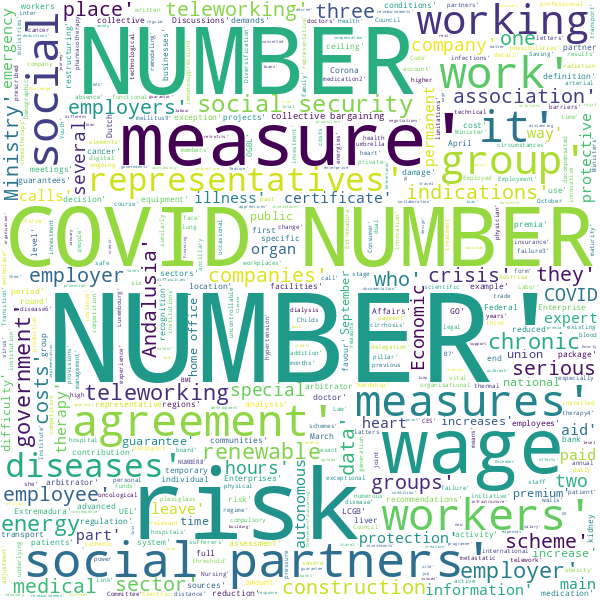

In [35]:
generate_wordcloud(str(nouns))

In [36]:
word_modeling = WordsModeling(nouns)

In [37]:
lda_training = word_modeling.lda_model_training()

In [38]:
lda_training.show_topic(8)

[('the employer', 0.022905923),
 ('Work', 0.015262478),
 ('occasional and exceptional circumstances', 0.00784823),
 ('a form', 0.0072929654),
 ('a vital pillar', 0.0072718137),
 ('the two representative social partners', 0.0072718137),
 ('discussions', 0.0072718137),
 ('NUMBER', 0.0024439648),
 ('NUMBER September NUMBER', 0.0023355137),
 ('The measure', 0.0023348164)]

In [39]:
frequency = word_modeling.words_frequency()

In [40]:
visualize = TopicInformation(lda_training, nouns)

In [41]:
visualize.format_topic_sentences()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,6.0,0.5499,"an inter-professional agreement, Agreement, NU...",[Agreement]
1,0.0,0.5499,"the Economic and Social Council CES, a first i...",[a teleworking regime]
2,5.0,0.5500,"companies, the COVID-NUMBER crisis, UEL, telew...",[the COVID-NUMBER crisis]
3,5.0,0.5500,"companies, the COVID-NUMBER crisis, UEL, telew...",[teleworking]
4,8.0,0.5499,"the employer, Work, occasional and exceptional...",[a vital pillar]
...,...,...,...,...
493,0.0,0.1001,"the Economic and Social Council CES, a first i...",[NUMBER September NUMBER]
494,6.0,0.1001,"an inter-professional agreement, Agreement, NU...",[NUMBER]
495,4.0,0.1000,"the Ministry, organisational work, a period, N...",[Employers]
496,4.0,0.1000,"the Ministry, organisational work, a period, N...",[the cost]


In [42]:
visualize.sort_dominant_topic()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.5499,"an inter-professional agreement, Agreement, NU...",[Agreement]
1,1,0.0,0.5499,"the Economic and Social Council CES, a first i...",[a teleworking regime]
2,2,5.0,0.5500,"companies, the COVID-NUMBER crisis, UEL, telew...",[the COVID-NUMBER crisis]
3,3,5.0,0.5500,"companies, the COVID-NUMBER crisis, UEL, telew...",[teleworking]
4,4,8.0,0.5499,"the employer, Work, occasional and exceptional...",[a vital pillar]
...,...,...,...,...,...
493,493,4.0,0.1001,"the Ministry, organisational work, a period, N...",[NUMBER September NUMBER]
494,494,4.0,0.1001,"the Ministry, organisational work, a period, N...",[NUMBER]
495,495,0.0,0.1000,"the Economic and Social Council CES, a first i...",[Employers]
496,496,6.0,0.1000,"an inter-professional agreement, Agreement, NU...",[the cost]


In [43]:
visualize.select_most_illustrative_sentence()

,Document_No,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,1,0.0,0.5499,"the Economic and Social Council CES, a first i...",[a teleworking regime]
1,31,1.0,0.5500,"it, the agreement, Teleworking, The work, NUMB...",[the agreement]
2,11,2.0,0.5500,"the company, the level, the employer associati...",[the employer association]
3,10,3.0,0.5500,"LCGB, the location, Employment, October NUMBER...",[LCGB]
4,13,4.0,0.5499,"the Ministry, organisational work, a period, N...",[the Ministry]
5,2,5.0,0.5500,"companies, the COVID-NUMBER crisis, UEL, telew...",[the COVID-NUMBER crisis]
6,0,6.0,0.5499,"an inter-professional agreement, Agreement, NU...",[Agreement]
7,40,7.0,0.5500,"the employee, social hardship, OGBL, three yea...",[the employee]
8,14,8.0,0.5500,"the employer, Work, occasional and exceptional...",[Work]
9,21,9.0,0.5500,"the social partners, the NUMBER threshold, dig...",[the social partners]


In [44]:
visualize.visualize_lda_model()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.009277 -0.012215       1        1  10.680162
5     -0.052189  0.007694       2        1  10.377439
8      0.002517 -0.001799       3        1  10.281157
1      0.024711  0.034516       4        1  10.278490
9      0.012298 -0.026948       5        1   9.978238
7      0.001350 -0.000801       6        1   9.880925
3      0.001344 -0.000793       7        1   9.880870
4      0.000289  0.000069       8        1   9.580982
0      0.000317  0.000046       9        1   9.580792
6      0.000085  0.000231      10        1   9.480946, topic_info=                                       Term      Freq     Total Category  \
5                                 companies  6.000000  6.000000  Default   
40                                       it  6.000000  6.000000  Default   
21                      the social partners  5.000000  5.000000  Default   
36                              the company  3.000000  3.000000  Default   
2                   the COVID-NUMBER crisis  3.000000  3.000000  Default   
..                                      ...       ...       ...      ...   
403                          January NUMBER  0.114510  1.134822  Topic10   
408                  an arbitrator decision  0.114505  1.134788  Topic10   
406  The NUMBER collective bargaining round  0.114509  1.134821  Topic10   
401                         one hourly wage  0.114507  1.134822  Topic10   
405                              this point  0.114506  1.134821  Topic10   

     logprob  loglift  
5    30.0000  30.0000  
40   29.0000  29.0000  
21   28.0000  28.0000  
36   27.0000  27.0000  
2    26.0000  26.0000  
..       ...      ...  
403  -6.0218   0.0623  
408  -6.0218   0.0623  
406  -6.0218   0.0623  
401  -6.0218   0.0623  
405  -6.0218   0.0623  

[596 rows x 6 columns], token_table=      Topic      Freq                      Term
term                                           
10        7  0.564469                      LCGB
32        4  0.613868               Teleworking
12        2  0.583001                       UEL
14        3  0.558643                      Work
5         2  0.793396                 companies
40        4  0.812809                        it
3         2  0.630756               teleworking
2         2  0.651859   the COVID-NUMBER crisis
30        4  0.584590             the agreement
36        1  0.618688               the company
38        6  0.476391              the employee
45        3  0.458422              the employer
11        1  0.566613  the employer association
28        1  0.572994             the exception
18        1  0.407868                 the level
37        7  0.580163              the location
21        5  0.894205       the social partners, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 6, 9, 2, 10, 8, 4, 5, 1, 7])